# Wooldridge Simple Linear Regression using Python
**Author:**
Brahim Zirari <br>
**Version:**
Python 3.13.5 <br>
**Topic:** <br>
* This notebook contains an example about simple & Multiple linear regression model from Introductory Econometrics: A Modern Approach, 5e by Jeffrey M. Wooldridge. Example 2.2. <br>
**Source** Book. 
<a href = "https://www.amazon.com/Introductory-Econometrics-Modern-Approach-Economics/dp/1111531048" > Click here </a>

In [71]:
## 1. OLS Simple Linear regression manual calculation
## 2. Simple Linear regression using statsmodels api
## 3. Simple Linear regression using statsmodels formula api
## 4. Multiple Linear regression smf from wooldridge
## 5. Multiple Linear Regression with scikit-learn
## 6. Gradient Descent in NumPy

# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to draw multiple plots
%matplotlib inline    

# Now, install and load the wooldridge package and lets get started!

# Chapter 2: The Simple Regression Model
**Example 2.2:** a Simple Wage equation <br>

**A model relating a person’s wage to observed education and other unobserved factors is** <br>

$$
wage_i = {\beta}_0 + {\beta}_1 \, educ_i + u_i
$$

**wage is measured in dollars per hour** <br>
**educ is years of education, then b1 measures:** <br>
The change in hourly wage given another year of education, holding all other factors fixed.
Some of those factors include labor force experience, innate ability, tenure with current
employer, work ethic, and numerous other things. <br>

In [ ]:
muid5ppp

In [ ]:
!pip install wooldridge

In [15]:
import wooldridge as wl

Load the wage1 data and check out the documentation.

In [2]:
wl.dataWoo(name = "wage1", description= True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [16]:
df = wl.dataWoo(name = "wage1")
print(df.head())
print(df.tail())

   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      48

In [8]:
import matplotlib.pyplot as plt

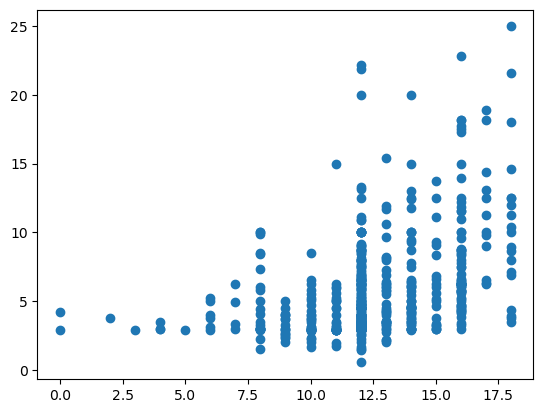

In [9]:
wage = df["wage"]
educ = df["educ"]
plt.scatter(educ, wage)
plt.show()

In [9]:
dta = df.iloc[:,[0,1]]
print(dta)
print(dta.head())
print(dta.tail())

      wage  educ
0     3.10    11
1     3.24    12
2     3.00    11
3     6.00     8
4     5.30    12
..     ...   ...
521  15.00    16
522   2.27    10
523   4.67    15
524  11.56    16
525   3.50    14

[526 rows x 2 columns]
   wage  educ
0  3.10    11
1  3.24    12
2  3.00    11
3  6.00     8
4  5.30    12
      wage  educ
521  15.00    16
522   2.27    10
523   4.67    15
524  11.56    16
525   3.50    14


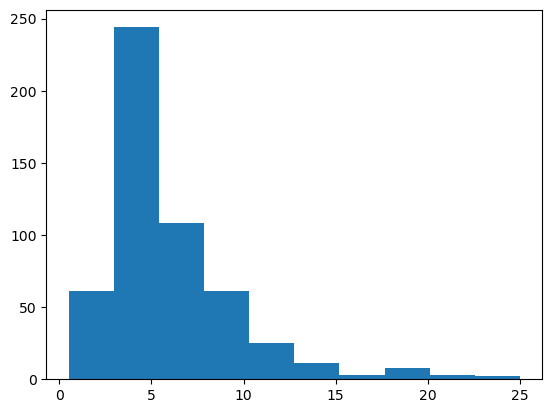

In [12]:
plt.hist(wage) #histogram of wage
plt.savefig("wageHist.pdf", dpi = 100)
plt.show()

Descreptive statistics:

In [16]:
dta = df.iloc[:,[0,1]]
print(dta)
ds = dta.describe()
ds.iloc[[1,2,3,7],:]

      wage  educ
0     3.10    11
1     3.24    12
2     3.00    11
3     6.00     8
4     5.30    12
..     ...   ...
521  15.00    16
522   2.27    10
523   4.67    15
524  11.56    16
525   3.50    14

[526 rows x 2 columns]


,wage,educ
mean,5.896103,12.562738
std,3.693086,2.769022
min,0.530000,0.000000
max,24.980000,18.000000


Download the table as word document

Plotting  Boxplot:

# Simple OLS Linear Regression Manual Calculation

In [44]:
# ingredients to the OLS formulas:
cov_xy = np.cov(educ,wage)[0,1]
print(cov_xy)
# The output is a 2x2 covariance matrix where:
# The element at [0,0] is the variance of x.
# The element at [1,1] is the variance of y.
# The element at [0,1] is the covariance of x with y.
# The element at [1,0] is the covariance of y with x. 
var_x = np.var(educ)
x_bar = np.mean(educ)
y_bar = np.mean(wage)
# manual calculation of OLS coefficients:
b1_hat = cov_xy / var_x
b0_hat = y_bar - b1_hat * x_bar
print("b1_hat is:", b1)
print("b0_hat is:", b0)

4.150863998572982
b1_hat is: 0.5423904151502517
b0_hat is: -0.9178058105986358


# Simple OLS Linear Regression Using statsmodels.api 

In [18]:
import statsmodels.api as sm

In [17]:
import statsmodels.api as sm
x = educ
y = wage
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()

Print the summary of the results.

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.78e-22
Time:                        10:34:29   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

# Simple OLS Linear Regression Using statsmodels.formula.api 

In [ ]:
import pandas as pd
file = "C:\Users\Brahim\tp01.csv"

In [29]:
dta.to_csv("tp01.csv")

In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'wage~educ', data = dta)
results = model.fit()
print(results.summary())
#par = results.params
#print(par)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.78e-22
Time:                        10:47:13   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

Results functions / tools

In [17]:
#results.summary()
#results.params
#results.fittedvalues 
#results.resid  

0      5.050100
1      5.591459
2      5.050100
3      3.426022
4      5.591459
         ...   
521    7.756896
522    4.508741
523    7.215537
524    7.756896
525    6.674178
Length: 526, dtype: float64

Plot the wage vs educ, adding a line representing the least squares fit.

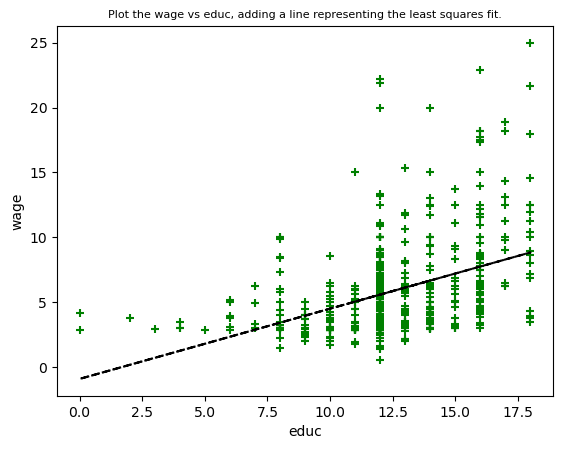

In [18]:
# scatter plot and fitted values:
plt.scatter(x, y, color= "green", marker="+")
plt.plot(x, results.fittedvalues, color="black", linestyle="--")
plt.title("Plot the wage vs educ, adding a line representing the least squares fit.", size= 8)
plt.ylabel("wage")
plt.xlabel("educ")
plt.show()

Obtain predicted values and residuals:

In [54]:
y_hat = results.fittedvalues
u_hat = results.resid
table = pd.DataFrame({"educ": x,
"wage": y,
"wage_hat": y_hat,
"residuals": u_hat})

print(table.head(10))

#5.05 = -0.90 + 0.54*11
#5.59 = -0.90 + 0.54*12

   educ   wage  wage_hat  residuals
0    11   3.10  5.050100  -1.950100
1    12   3.24  5.591459  -2.351459
2    11   3.00  5.050100  -2.050100
3     8   6.00  3.426022   2.573978
4    12   5.30  5.591459  -0.291459
5    16   8.75  7.756896   0.993104
6    18  11.25  8.839615   2.410385
7    12   5.00  5.591459  -0.591459
8    12   3.60  5.591459  -1.991460
9    17  18.18  8.298256   9.881745


# Multiple Regression Analysis

$$
\hat{wage}_i = \beta_0 + \beta_1 (\text{educ}_i) + \beta_2 (\text{exper}_i) + \beta_3 (\text{tenure}_i) + \varepsilon_i
$$

In [19]:
#df[:]
model = smf.ols("wage~educ + exper + tenure", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.41e-41
Time:                        22:04:35   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.0

In [ ]:
df = pd.read_csv(file)
print(df)

In [22]:
wage_hat = results.fittedvalues
table01 = pd.DataFrame({"Y":wage,
                        "Y_hat" : wage_hat})
print(table01)

         Y     Y_hat
0     3.10  3.760560
1     3.24  5.144853
2     3.00  3.760560
3     6.00  7.641447
4     5.30  4.809760
..     ...       ...
521  15.00  7.361997
522   2.27  3.161595
523   4.67  9.448991
524  11.56  6.991672
525   3.50  6.301548

[526 rows x 2 columns]


# Regression Diagnostics

## Heteroscedasticity Tests

1. Breusch-Pagan Lagrange Multiplier test

In [66]:
from statsmodels.stats.diagnostic import het_breuschpagan

name = ["breuschpagan statistic", "p-value"]
test = het_breuschpagan(results.resid, results.model.exog)
list(zip(name, test))

[('breuschpagan statistic', np.float64(10.761205855317225)),
 ('p-value', np.float64(0.013089754002950591))]

2. Lagrange Multiplier Heteroscedasticity Test by White

In [23]:
from statsmodels.stats.diagnostic import het_white

name = ["White  statistic", "p-value"]
test = het_white(results.resid, results.model.exog)
list(zip(name, test))

[('White  statistic', np.float64(63.960009051619856)),
 ('p-value', np.float64(2.2976863558025742e-10))]

# Autocorrelation Tests

1. Breusch-Godfrey Lagrange Multiplier tests for residual autocorrelation.

In [24]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey 
name = ["breusch_godfrey statistic", "p-value"]

test = acorr_breusch_godfrey(results, nlags=None, store=False)
list(zip(name, test))

[('breusch_godfrey statistic', np.float64(10.73517937005533)),
 ('p-value', np.float64(0.3785187866742687))]

# Multicollinearity Tests

1. Correlation matrix

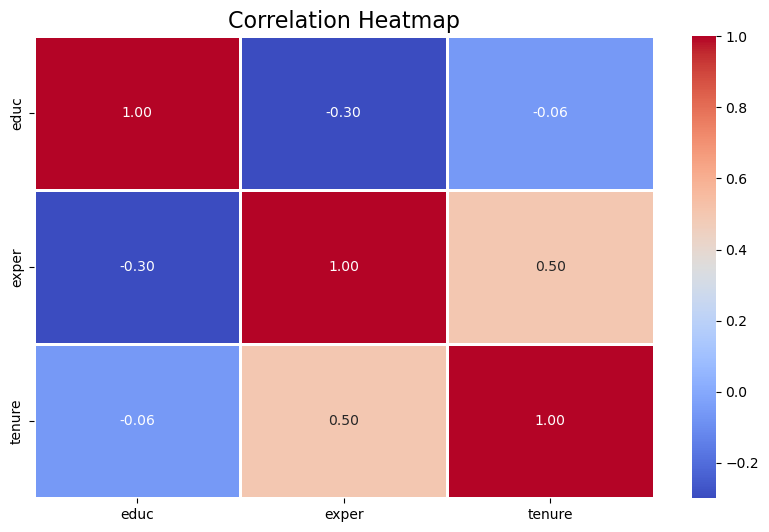

In [31]:
import seaborn as sns
df_mlr = df.iloc[:, [0,1,2,3]]
df_mlr_without_y = df_mlr.drop("wage", axis=1)
# Correlation matrix
correlation_matrix = df_mlr_without_y.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)

# Title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [40]:
#df.corr()
df_mlr = df.iloc[:,[0,1,2,3]]
print(df_mlr)
df_mlr_without_y.corr()

      wage  educ  exper  tenure
0     3.10    11      2       0
1     3.24    12     22       2
2     3.00    11      2       0
3     6.00     8     44      28
4     5.30    12      7       2
..     ...   ...    ...     ...
521  15.00    16     14       2
522   2.27    10      2       0
523   4.67    15     13      18
524  11.56    16      5       1
525   3.50    14      5       4

[526 rows x 4 columns]


,educ,exper,tenure
educ,1.000000,-0.299542,-0.056173
exper,-0.299542,1.000000,0.499291
tenure,-0.056173,0.499291,1.000000


2. Variance Inflation Fctor VIF

In [84]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_mlr_without_y.columns

# Calculate VIF and round to 4 decimal places
print(df_mlr_without_y.shape[1])
vif_data["VIF"] = [round(variance_inflation_factor(df_mlr_without_y.values, i), 4) for i in range(df_mlr_without_y.shape[1])]
# Sort VIF values in descending order
#vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif_data)

3
  feature     VIF
0    educ  2.1160
1   exper  2.9207
2  tenure  2.0075


# Normality and Distribution Tests

1. Jarque Bera Test

In [26]:
from scipy.stats import jarque_bera
name = ["Jarque-Bera test", "Chi^2 two-tail prob."]
test = jarque_bera(results.resid)
list(zip(name, test))

[('Jarque-Bera test', np.float64(650.8075112915257)),
 ('Chi^2 two-tail prob.', np.float64(4.7746828810973804e-142))]

(array([  7.,  37., 182., 172.,  70.,  35.,  11.,   4.,   4.,   4.]),
 array([-7.6067704 , -5.38073337, -3.15469634, -0.9286593 ,  1.29737773,
         3.52341476,  5.74945179,  7.97548883, 10.20152586, 12.42756289,
        14.65359993]),
 <BarContainer object of 10 artists>)

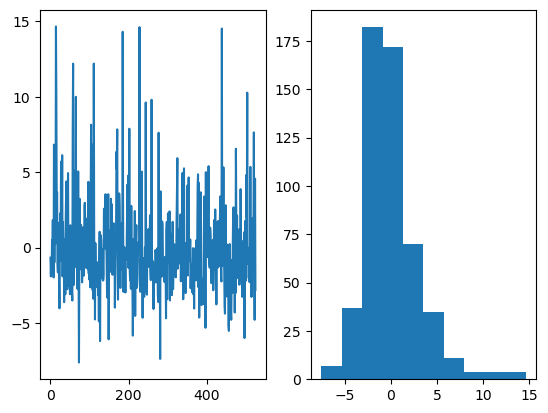

In [32]:
figure, (axis1, axis2) = plt.subplots(1,2)
axis1.plot(results.resid)
axis2.hist(results.resid)

## Multiple Linear Regression with scikit-learn

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Define features and target
X = df[['educ', 'exper', 'tenure']]
y = df['wage']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train)
print(X_test)
#print(y_train)
#print(y_test)

     educ  exper  tenure
234    12     29       0
468    12     17       6
94     12      4       1
340     9     23      20
355    11      1       0
..    ...    ...     ...
71     17     17       2
106    12     14      11
270    10      8       0
435    14     23       0
102    12     35      12

[368 rows x 3 columns]
     educ  exper  tenure
311    12     36       8
397    12     47      25
6      18     15       7
184    12     14      11
78     12     19      13
..    ...    ...     ...
382    12     14      12
24     11     37       8
17     13     16      10
266    13     37      17
66     16      7       4

[158 rows x 3 columns]


In [35]:
# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict on test data
import pandas as pd
y_pred = model.predict(X_test)
#print(y_pred)
table03 = pd.DataFrame({"Real":y_test,
                        "Predicted":y_pred})
print(table03.head(50))

      Real  Predicted
311   3.33   6.521797
397   4.29   9.898073
6    11.25   9.483206
184   5.00   6.528326
78    8.45   7.016751
301   8.63   6.384495
525   3.50   6.248382
488   8.33   7.127966
117   3.64   4.711928
137  10.00   7.384486
10    6.25   7.177194
512  10.00   4.543483
75   11.90   8.846051
440  11.25  12.481226
480   4.50   4.248117
140  10.95  10.834604
2     3.00   3.613340
155  10.00   6.751040
377   8.53   4.394611
131   5.00   6.373972
438   2.90   5.084987
513   4.95   4.844331
381   3.26   7.897525
346   3.30   6.335267
334   3.50   5.680918
395   3.76   0.660981
393  10.00   9.149277
465   4.50   5.282055
437   4.00   6.173493
508   3.50   5.485338
521  15.00   7.324877
55    3.25   6.078606
227   3.00   2.417628
457   6.50  12.432140
30   13.00   6.874109
73    2.91  10.877601
333  11.98   9.858943
68    5.71   7.774455
9    18.18  11.602831
79    7.14   8.155233
101   3.75   4.518869
104  15.00   6.845644
278   4.28   4.991730
132   3.52   5.538417
493   2.30

In [40]:
# Output results
import numpy as np
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂, β₃):", model.coef_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Intercept (β₀): -3.1476803208861472
Coefficients (β₁, β₂, β₃): [0.610163   0.02461383 0.18267791]
Mean Squared Error (MSE): 10.147495910600261
Root Mean Squared Error (RMSE): 3.1855134453648537
Mean Absolute Error: 2.1741808826900315


**MSE_Interpretation:** <br>
A smaller MSE means better model performance (predictions are closer to actual values). <br>
A larger MSE means worse performance (predictions are far from actual values). <br>
**RMSE_Interpretation:** <br>
That means the model’s predictions are off by about 3.08 units from the actual values, on average. <br>
**Mean Absolute Error:**
$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
The number printed (MAE) is the average absolute difference between actual and predicted values.

**Coefficient of determination**

In [44]:
score = model.score(X_test, y_test)
print("R_squared:", score)

R_squared: 0.2848205178612295


**R² score** (coefficient of determination):

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

Where:

- \( y_i \) = actual observed value  
- \( \hat{y}_i \) = predicted value  
- \( \bar{y} \) = mean of observed values  

**Interpretation:**
The model explains about 30.85% of the variation in the dependent variable (y_test)
using the independent variables (X_test).

The remaining ≈69% of variation is unexplained by the model — likely due to other factors or noise.

## Gradiant Descent 
$$
Min   J(\theta)=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat y_i)^2
$$



### Example Data for Gradient Descent
| Observation (i) | \( x_i \) | \( y_i \) |
|-----------------|:---------:|:---------:|
| 1 | 1 | 7 |
| 2 | 2 | 8 |
| 3 | 2 | 7 |
| 4 | 3 | 9 |
| 5 | 4 | 11 |
| 6 | 5 | 10 |
| 7 | 5 | 12 |

---

**Goal:**  
Estimate parameters \( \theta_0 \) (intercept) and \( \theta_1 \) (slope)  
by minimizing the cost function:

Final Cost: [np.float64(3.3571428571428568), np.float64(2.6266144314868813), np.float64(2.071534075972807), np.float64(1.6497558122249611), np.float64(1.329257961883018), np.float64(1.0857110888104273), np.float64(0.9006301698515731), np.float64(0.7599706508455268), np.float64(0.653061757848306), np.float64(0.5717960481692984), np.float64(0.510013647333112), np.float64(0.46303440454375994), np.float64(0.42730243369129467), np.float64(0.4001160426631812), np.float64(0.37942253899495126), np.float64(0.36366232727591025), np.float64(0.35165045745206513), np.float64(0.34248662757750664), np.float64(0.33548680569101513), np.float64(0.3301312774749434), np.float64(0.32602517389749835), np.float64(0.32286848089871384), np.float64(0.320433253345046), np.float64(0.3185463026442883), np.float64(0.3170760431389629), np.float64(0.31592249825706703), np.float64(0.3150097073837454), np.float64(0.3142799567530779), np.float64(0.3136893961941483), np.float64(0.31320470882169804), np.float64(0.31280058

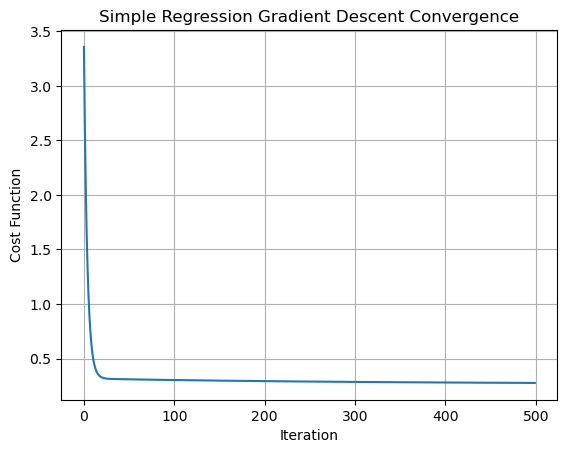

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 2, 3, 4, 5, 5], dtype=float)
y = np.array([7, 8, 7, 9, 11, 10, 12], dtype=float)

def gradient_descent(x, y):
    theta_0 = 5       # starting intercept guess
    theta_1 = 2       # starting slope guess
    iterations = 500
    m = len(x)        # number of data points
    learning_rate = 0.01
    cost_history = []  # store cost to plot later

    for i in range(iterations):
        # prediction
        h_theta = theta_0 + theta_1 * x

        # cost function (Mean Squared Error)
        cost = (1 / (2 * m)) * sum((h_theta - y) ** 2)
        cost_history.append(cost)  # save the cost for each iteration

        # gradients (partial derivatives)
        d_theta1 = (1 / m) * sum(x * (h_theta - y))
        d_theta0 = (1 / m) * sum(h_theta - y)

        # update parameters
        theta_1 = theta_1 - learning_rate * d_theta1
        theta_0 = theta_0 - learning_rate * d_theta0

    print("Final Cost:", cost_history)
    print("Final equation: y =", round(theta_0, 3), "+", round(theta_1, 3), "x")

    return theta_0, theta_1, cost_history  # return everything for plotting

# Run gradient descent and get results
theta_0, theta_1, hist_simple = gradient_descent(x, y)

# Plot convergence (Cost vs Iteration)
plt.figure()
plt.plot(hist_simple)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Simple Regression Gradient Descent Convergence')
plt.grid(True)
plt.savefig("Cost J.png")
plt.show()

**Multiple Regression Gradient Descent**

Final Cost: 0.8820000000000218
Final Equation:
y = 100.936 + -5.264X1 + 0.372X2 + 5.254X3


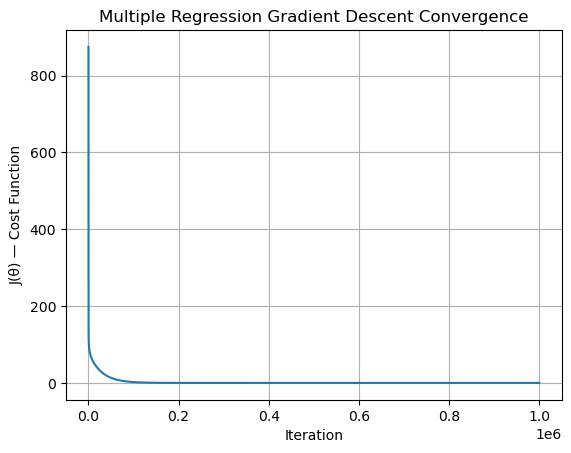

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Input data from your table
X1 = np.array([5, 5, 6, 7, 7], dtype=float)
X2 = np.array([20, 35, 38, 40, 46], dtype=float)
X3 = np.array([6, 6, 8, 8, 10], dtype=float)
y  = np.array([114, 120, 123, 121, 135], dtype=float)

def gradient_descent_multi(X1, X2, X3, y):
    theta_0 = 5     # intercept
    theta_1 = 2     # coefficient for X1
    theta_2 = 3     # coefficient for X2
    theta_3 = 4     # coefficient for X3
    iterations = 1000000
    m = len(y)
    learning_rate = 0.001
    cost_history = []

    for i in range(iterations):
        # prediction
        y_pred = theta_0 + theta_1*X1 + theta_2*X2 + theta_3*X3

        # cost function (Mean Squared Error)
        cost = (1 / (2 * m)) * sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # partial derivatives
        d_theta0 = (1 / m) * sum(y_pred - y)
        d_theta1 = (1 / m) * sum((y_pred - y) * X1)
        d_theta2 = (1 / m) * sum((y_pred - y) * X2)
        d_theta3 = (1 / m) * sum((y_pred - y) * X3)

        # update parameters
        theta_0 = theta_0 - learning_rate * d_theta0
        theta_1 = theta_1 - learning_rate * d_theta1
        theta_2 = theta_2 - learning_rate * d_theta2
        theta_3 = theta_3 - learning_rate * d_theta3

    print("Final Cost:", cost)
    print("Final Equation:")
    print(f"y = {round(theta_0, 3)} + {round(theta_1, 3)}X1 + {round(theta_2, 3)}X2 + {round(theta_3, 3)}X3")

    return theta_0, theta_1, theta_2, theta_3, cost_history

# Run the model
theta_0, theta_1, theta_2, theta_3, hist_multi = gradient_descent_multi(X1, X2, X3, y)

# Plot convergence (Cost vs Iteration)
plt.figure()
plt.plot(hist_multi)
plt.xlabel('Iteration')
plt.ylabel('J(θ) — Cost Function')
plt.title('Multiple Regression Gradient Descent Convergence')
plt.grid(True)
plt.show()

**Normal Equation_Multiple regression Example**

---
$$
\hat{y} = X\theta
$$

---

$$
\boxed{\theta = (X^\top X)^{-1} X^\top y}
$$

---
### Dataset

| Intercept |  X1 | X2 |  X3 | y |
|------------|------------|--------|-------------|-------------|
| 1 | 2104 | 5 | 45 | 460 |
| 1 | 1416 | 3 | 40 | 232 |
| 1 | 1534 | 3 | 30 | 315 |
| 1 | 852  | 2 | 36 | 178 |

We want to find the parameters $(\theta = [\theta_0, \theta_1, \theta_2, \theta_3]).$

In [2]:
#creating features vector
X = np.array([
    [1, 2104, 5, 45],
    [1, 1416, 3, 40],
    [1, 1534, 3, 30],
    [1, 852,  2, 36]
], dtype=float)

# Output vector
y = np.array([460, 232, 315, 178], dtype=float)

# Normal Equation
X_T_X = np.dot(X.T,X)
X_T_X_inv = np.linalg.inv(X_T_X)
P1 = np.dot(X_T_X_inv, X.T)
thetas = np.dot(P1, y)
#theta = np.linalg.inv(X.T @ X) @ X.T @ y
print("Estimated coefficients θ:", np.round(thetas, 5))

Estimated coefficients θ: [ 3.1328229e+02 -2.0004000e-01  2.0946571e+02 -1.0660500e+01]


**Normal Equation using wooldridge model**

In [ ]:
#pip install wooldridge

In [22]:
import wooldridge as wl
df = wl.dataWoo("wage1")
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [27]:
# Extract features (X) and target (y)
X = df[["educ","exper","tenure"]].values     # converts to numpy array
y = df['wage'].values

# Add a column of 1s for the intercept
X_b = np.c_[np.ones((len(X), 1)), X]   # shape (m, 3)

# Apply the Normal Equation
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)

print("Estimated θ coefficients:", np.round(theta, 4))

Estimated θ coefficients: [-2.8727  0.599   0.0223  0.1693]


In [ ]:
#understand np.c_

In [5]:
a1 = np.array([1,2,5])
a2 = np.array([3,7,8])
a = np.array([a1,a2])
a

array([[1, 2, 5],
       [3, 7, 8]])

In [6]:
b = np.c_[a2,a1]
b

array([[3, 1],
       [7, 2],
       [8, 5]])

## Mean Squared Error (MSE) — Training vs Testing Data

### Definition

The **Mean Squared Error (MSE)** measures the average squared difference between the predicted values and the actual values.

$$
\text{MSE} = \frac{1}{m}\sum_{i=1}^{m}(y_i - h_\theta(x_i))^2
$$
 
---

### Training vs Testing MSE

If the dataset is split into **training** and **testing** parts, we compute MSE separately:

$$
\text{MSE}_{\text{train}} = \frac{1}{m_{\text{train}}}\sum_{i=1}^{m_{\text{train}}}(y_i^{(train)} - h_\theta(x_i^{(train)})^2
$$

$$
\text{MSE}_{\text{test}} = \frac{1}{m_{\text{test}}}\sum_{i=1}^{m_{\text{test}}}(y_i^{(test)} - h_\theta(x_i^{(test)})^2
$$


**Good Fit**

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]], dtype=float)
y = np.array([2,5,7,10,15,18,25,30,35,40], dtype=float)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

h_theta_train = model.predict(X_train)
h_theta_test  = model.predict(X_test)

print(y_train, h_theta_train)
print(y_test,h_theta_test)

[ 2. 30.  7. 40. 15. 10. 25.] [-0.96287129 29.68811881  7.79455446 38.44554455 16.5519802  12.17326733
 25.30940594]
[35.  5. 18.] [34.06683168  3.41584158 20.93069307]


In [44]:
mse_train = mean_squared_error(y_train, h_theta_train)
mse_test = mean_squared_error(y_test, h_theta_test)

print("Train MSE:", round(mse_train,3))
print("Test MSE:", round(mse_test,3))

Train MSE: 2.736
Test MSE: 3.99


**UnderFittiing**

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
dt = pd.read_csv(url)

In [3]:
#dt.isnull()
dt.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
X = dt[['horsepower']].dropna()
y = dt[["mpg"]]
X = X[:300]
y = y[:300]
#print(X)
print(y)

      mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
295  35.7
296  27.4
297  25.4
298  23.0
299  27.2

[300 rows x 1 columns]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
h_theta_train = model.predict(X_train)
h_theta_test  = model.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, h_theta_train)
mse_test  = mean_squared_error(y_test, h_theta_test)

print("Training MSE:", round(mse_train,3))
print("Testing MSE :", round(mse_test,3))

Training MSE: 29.096
Testing MSE : 24.168


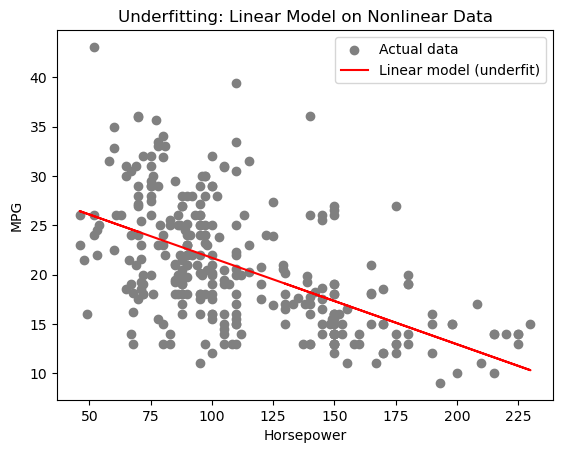

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color="gray", label="Actual data")
plt.plot(X, model.predict(X), color="red", label="Linear model (underfit)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Underfitting: Linear Model on Nonlinear Data")
plt.legend()
plt.show()

**Overfitting**

**Check wooldridge model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["educ","exper","tenure"]]     # converts to numpy array
y = df['wage']

In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

h_theta_train = model.predict(X_train)
h_theta_test  = model.predict(X_test)

mse_train = mean_squared_error(y_train, h_theta_train)
mse_test  = mean_squared_error(y_test, h_theta_test)

print("Train MSE:", round(mse_train,3))
print("Test  MSE:", round(mse_test,3))

Train MSE: 9.159
Test  MSE: 10.147
